In [1]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re
import random 

In [2]:
import nltk
import gensim.models.word2vec as w2v
import gensim
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE


In [3]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/home/vikrant/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [5]:
'''
for time being  i am using pre trained model provided in github link ---> https://github.com/Kyubyong/wordvectors
to use train model please uncommnent this section

'''

'\nfor time being  i am using pre trained model provided in github link ---> https://github.com/Kyubyong/wordvectors\nto use train model please uncommnent this section\n\n'

In [6]:
model = gensim.models.Word2Vec.load('./hi.bin')

2018-03-17 16:42:07,412 : INFO : loading Word2Vec object from ./hi.bin
2018-03-17 16:42:07,694 : INFO : setting ignored attribute syn0norm to None
2018-03-17 16:42:07,695 : INFO : setting ignored attribute cum_table to None
2018-03-17 16:42:07,696 : INFO : Model saved using code from earlier Gensim Version. Re-loading old model in a compatible way.
2018-03-17 16:42:07,697 : INFO : loading Word2Vec object from ./hi.bin
2018-03-17 16:42:07,997 : INFO : setting ignored attribute syn0norm to None
2018-03-17 16:42:07,998 : INFO : setting ignored attribute cum_table to None
2018-03-17 16:42:07,999 : INFO : loaded ./hi.bin


In [7]:
print("Word2Vec vocabulary length:", len(model.wv.vocab))

Word2Vec vocabulary length: 30393


In [8]:
model.most_similar("गीत")

/home/vikrant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2018-03-17 16:42:08,221 : INFO : precomputing L2-norms of word weight vectors


[('गाने', 0.8208057284355164),
 ('गीतों', 0.7549088001251221),
 ('गाना', 0.7197213768959045),
 ('गानों', 0.6698288321495056),
 ('धुन', 0.6386563777923584),
 ('गायन', 0.627243161201477),
 ('गज़ल', 0.6249793171882629),
 ('फाग', 0.6246353387832642),
 ('गान', 0.6159066557884216),
 ('गाये', 0.6153302192687988)]

In [9]:
model.most_similar('धार्मिक',topn=20)

/home/vikrant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('विश्वासों', 0.6627747416496277),
 ('सांस्कृतिक', 0.6515656113624573),
 ('अनुष्ठानों', 0.6393204927444458),
 ('आध्यात्मिक', 0.6370500326156616),
 ('आस्थाओं', 0.6210089921951294),
 ('अंधविश्वासों', 0.6133425235748291),
 ('नैतिक', 0.594624400138855),
 ('रूढ़िवादी', 0.5914101600646973),
 ('परम्पराओं', 0.585075855255127),
 ('हिंदू', 0.5824010968208313),
 ('राजनीतिक', 0.5773956775665283),
 ('सामाजिक-सांस्कृतिक', 0.5700770616531372),
 ('हिंदुओं', 0.5690426826477051),
 ('सामाजिक', 0.5685431957244873),
 ('राजनैतिक', 0.5681086182594299),
 ('बौद्धों', 0.5654340386390686),
 ('ईसाई', 0.5611101388931274),
 ('रीति-रिवाजों', 0.5605183243751526),
 ('आध्यात्मिकता', 0.5519877672195435),
 ('वैचारिक', 0.5517699122428894)]

In [10]:
model.most_similar('धर्म')

/home/vikrant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('धर्मों', 0.599532425403595),
 ('संप्रदाय', 0.5954092741012573),
 ('धर्मावलंबियों', 0.595169723033905),
 ('बौद्धों', 0.5913171172142029),
 ('ईसाई', 0.589230477809906),
 ('सम्प्रदाय', 0.580707311630249),
 ('इस्लाम', 0.5780146718025208),
 ('पंथ', 0.5771386623382568),
 ('सनातन', 0.5585727691650391),
 ('महायान', 0.5581678748130798)]

In [11]:
model.most_similar('धर्म',topn=20)
#a = model.wv.most_similar('धर्म',topn =4)

/home/vikrant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('धर्मों', 0.599532425403595),
 ('संप्रदाय', 0.5954092741012573),
 ('धर्मावलंबियों', 0.595169723033905),
 ('बौद्धों', 0.5913171172142029),
 ('ईसाई', 0.589230477809906),
 ('सम्प्रदाय', 0.580707311630249),
 ('इस्लाम', 0.5780146718025208),
 ('पंथ', 0.5771386623382568),
 ('सनातन', 0.5585727691650391),
 ('महायान', 0.5581678748130798),
 ('सम्प्रदायों', 0.5557546019554138),
 ('धर्मांतरण', 0.5459046363830566),
 ('शिक्षाओं', 0.5450353026390076),
 ('अध्यात्म', 0.5396395921707153),
 ('अहिंसा', 0.536888837814331),
 ('बौद्ध', 0.5334830284118652),
 ('धर्मशास्त्र', 0.5312783718109131),
 ('भिक्षुओं', 0.5290490388870239),
 ('ईसाइयत', 0.5273949503898621),
 ('इसाई', 0.5253320336341858)]

In [12]:
lmodel = []
label  = []
lmodel.append(model['धर्म'])
lmodel.append(model['धार्मिक'])
lmodel.append(model['सांस्कृतिक'])
lmodel.append(model['संस्कृत'])
label.extend(['धर्म','धार्मिक','सांस्कृतिक','संस्कृत'])
#label.extend(['dharm','dharmik','sanskritik','sanskrit'])
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word2vec= tsne.fit_transform(lmodel)
#all_word2vec[:,0]

/home/vikrant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vikrant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/home/vikrant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/home/vikrant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


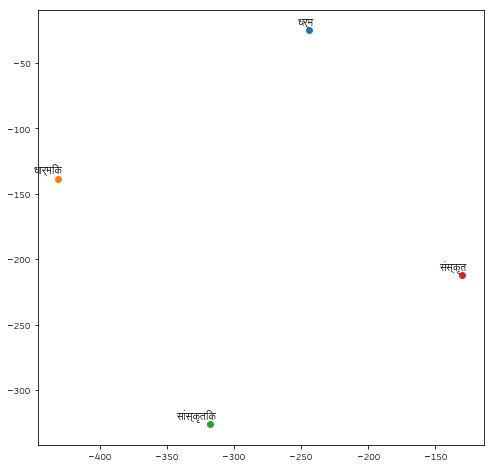

In [13]:
x = []
y = []
for value in all_word2vec:
    x.append(value[0])
    y.append(value[1])
plt.rc('font', family='Lohit Devanagari')
        
plt.figure(figsize=(8, 8)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(label[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()

In [14]:
def display_100_words(model):
    words = model.wv.vocab
    list_word = []
    for keys, value in words.items():
        list_word.append(keys)
    
    #print(list_word[1])
    print(list_word[:10])
    random.shuffle(list_word)
    #print(list_word[:10])
    wrd_vec_list =[]
    labels = []
    for i in range(100):
        wrd_vec_list.append(model[list_word[i]])
        labels.append(list_word[i])
    tsne_1 = sklearn.manifold.TSNE(n_components=2, random_state=0)
    all_100_word= tsne.fit_transform(wrd_vec_list)
    plt.rc('font', family='Lohit Devanagari')
    X_ax=[]
    Y_ax=[]
    for value in all_100_word:
        X_ax.append(value[0])
        Y_ax.append(value[1])
    plt.figure(figsize= (12,12))
    for i in range(len(X_ax)):
        plt.scatter(X_ax[i],Y_ax[i])
        plt.annotate(labels[i],
                     xy=(X_ax[i], Y_ax[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
        

['विनिवेश', 'लवण', 'देवीसिंह', 'घाटा', 'हस्तचालित', 'डीवीडी', 'उठायी', 'श्रीकाकुलम', 'हिग्स', 'घटनाक्रम']


/home/vikrant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


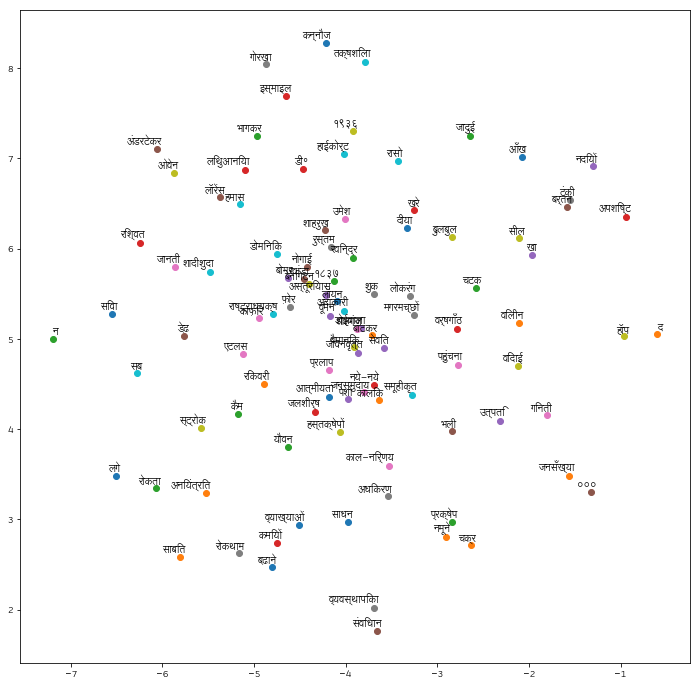

In [15]:
display_100_words(model)